In [ ]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
import re
import string
import tensorflow_hub as hub
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Suicide Risk Classifier - Version 0.0.1

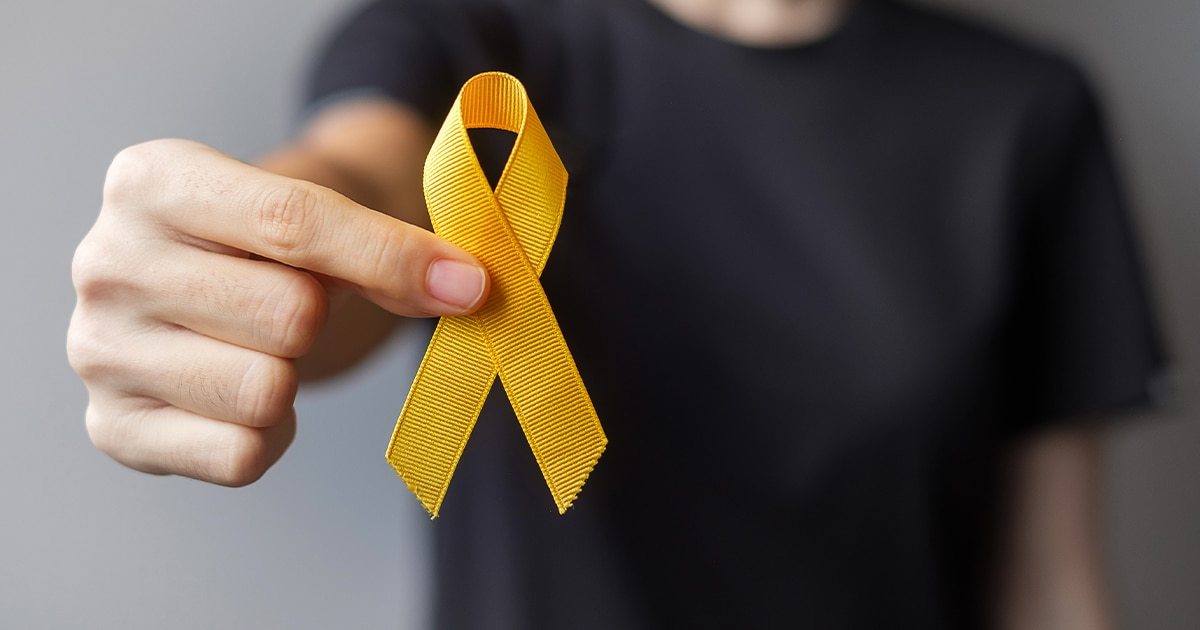

### Welcome to the Suicide Risk Classifier
<br>

### Instructions:
<br>

#### 1. Insert the text
#### 2. Press the button "Run"
#### 3. Check the suicide probability and related action
<br>

### The dataset:

#### The dataset is a collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021.
<br>

### Source of dataset: 

#### https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch
<br>

### Created by: Giuliano Dal Bó
<br>

### Linked In: https://www.linkedin.com/in/giulianodalbo/
<br>

In [ ]:
text_var = text_var

In [ ]:
#Cleaning text

gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
finally:
    gist_file.close()
    
stop = set(stopwords)

def remove_stopwords(text):
    text = [w.lower() for w in text.split() if w.lower() not in stop]

    return " ".join(text)

text = remove_stopwords(text_var)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S")

    return url.sub(r"", text)

text = remove_URL(text_var)

def remove_html(text):
    html = re.compile(r"<.*?>")

    return html.sub("", text)

text = remove_html(text_var)

def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+",
            flags = re.UNICODE)
    
    return emoji_pattern.sub(r"", text)

text = remove_emoji(text_var)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)

    return text.translate(table)

text = remove_punct(text_var)

def remove_numbers(text):
    numbers = re.compile(r"[0-9]+")

    return numbers.sub("", text)

text = remove_numbers(text_var)

special_characters = """!()-[]{};:'"\,<>./?@#$%^&*_~’"""

def remove_special_characters(text):
    new_string = ""
    for x in text:
        if x not in special_characters:
            new_string = new_string + x

    return new_string

text = remove_special_characters(text_var)

text = remove_stopwords(text_var)

In [ ]:
#Including the text string inside an array

text_array = np.array([text])

In [ ]:
#Loading of model

model = jb.load("model_ensemble.pkl.z")

In [ ]:
#Features from text

model_path = 'https://tfhub.dev/google/nnlm-en-dim128/2'

embed = hub.load(model_path)

text_embed = embed(text_array).numpy()

In [ ]:
#Prediction

p_proba = model.predict_proba(text_embed)

In [ ]:
#Definition of classes

risk_class = np.where(p_proba[:,1] <= 0.3, "Low probability",
                 np.where(((p_proba[:,1] > 0.3) & (p_proba[:,1] <= 0.6)), "Medium probability", "High probability"))

<br>
<br>

# Suicide Risk Prediction
<br>

- Low probability (below 30%)
- Medium probability (between 30% and 60%)
- High probability (above 60%)

In [ ]:
risk_label = risk_class[-1]

ax = plt.axes()

if risk_label == "Low probability":
    circle = plt.Circle((0.5, 0.5), 0.3, color='green')
    ax.text(0.9, 0.4, 'Suicide probability: {}%\nRisk label: {}\nNo further action is necessary'.format(round(p_proba[-1,1]*100, 2), risk_label), fontsize = 20)
elif risk_label == "Medium probability":
    circle = plt.Circle((0.5, 0.5), 0.3, color='yellow')
    ax.text(0.9, 0.4, 'Suicide probability: {}%\nRisk label: {}\nThe behavior must be closely monitored'.format(round(p_proba[-1,1]*100, 2), risk_label), fontsize = 20)
else:
    circle = plt.Circle((0.5, 0.5), 0.3, color='red')
    ax.text(0.9, 0.4, 'Suicide probability: {}%\nRisk label: {}\nDirect contact by a mental health professional required'.format(round(p_proba[-1,1]*100, 2), risk_label), fontsize = 20)

    
ax.add_patch(circle)

plt.axis("off");